In [1]:
from init import config

# シミュレータの作成
- 最初から初めて、データを逐次的に追加、シミュレート。

In [2]:
from db import df
import numpy as np
def simulate(callback, sec_by=None):
    # 最初から初めて、データを逐次的に追加、シミュレート。
    x = []
    y = []
    ticker = df.read_ticker(sec_by=sec_by)
    ltp = ticker["ltp"]
    print("{} frames".format(ltp.shape[0]))
    for i,v in ltp.iteritems():
        print("■", end="")
        x.append(i)
        y.append(v)
        callback(np.array(x), np.array(y))
    print("simulate done")

def p(x, y):
    return

simulate(p, 60*60)

2017-12-27 09:33:57,158 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2017-12-27 09:33:57,160 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:33:57,174 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2017-12-27 09:33:57,178 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:33:57,204 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8' and `Collation` = 'utf8_bin'
2017-12-27 09:33:57,205 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:33:57,213 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2017-12-27 09:33:57,215 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:33:57,219 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2017-12-27 09:33:57,221 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:33:57,228 INFO sqlalchemy.engine.base.Engine SELECT CAST('test collated returns' AS CHAR CHARACTER SET utf8) COLLATE utf8_bin AS anon_1
2017-12-27 09

/usr/local/lib/python3.5/dist-packages/sqlalchemy/dialects/mysql/base.py:1576: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


328 frames
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■simulate done


# アニメーション
 - TODO: 複数のグラフをメソッド単位で分けて、結合できるように。

<IPython.core.display.Javascript object>


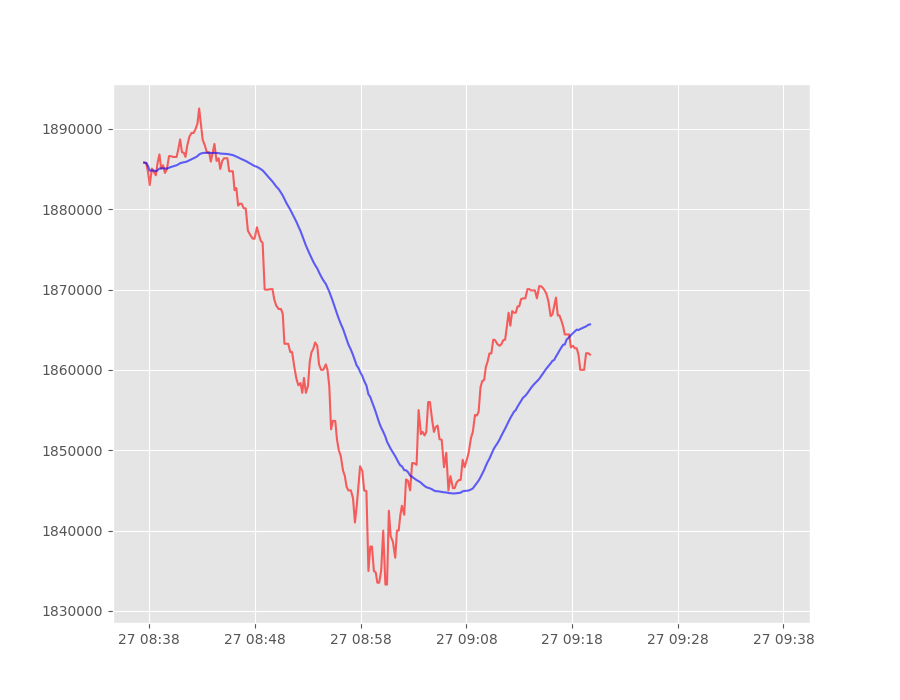

2017-12-27 09:38:03,331 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT * FROM ticker `
2017-12-27 09:38:03,335 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:38:03,347 INFO sqlalchemy.engine.base.Engine ROLLBACK
2017-12-27 09:38:03,362 INFO sqlalchemy.engine.base.Engine SELECT * FROM ticker 
2017-12-27 09:38:03,370 INFO sqlalchemy.engine.base.Engine ()
328 frames
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■simulate done


In [5]:
%matplotlib nbagg
import numpy as np
import matplotlib.animation as animation
from plotter.plot import plt, set_figure
import learner
import datetime
import pandas as pd

set_figure((9, 7))
fig = plt.figure()
ims = []
def add_plot(x, y):
    # 描画
    im = plt.plot(x, y, "-r")
    ims.append(im)

def poly_plot(deg):
    # 近似曲線でやるやつ。
    def plot(x, y):
        if len(x) < 3:
            return 
        x_ = np.array([i.timestamp() for i in x])
        # 近似曲線多項式
        poly, grad = learner.polyfit(x_, y, deg)
        poly_y = np.array([poly(i) for i in x_])
        # 描画
        im = plt.plot(x, y, "-r", x, poly_y, "-b", alpha=0.6)
        ims.append(im)
    return plot

def mean_plot(sec_by=None):
    means_y = []
    # 累積の平均を追うもの。
    def plot(x, y):
        # 時間で抽出
        if sec_by is not None:
            df = pd.DataFrame(y, x)
            end_by = df.index.max() - datetime.timedelta(seconds=sec_by)
            end_by = end_by.strftime('%Y-%m-%d %H:%M:%S')
            df = df.loc[end_by:]
            y_mean = df[0].mean()
        else:
            y_mean = y.mean()
        means_y.append(y_mean)
        im = plt.plot(x, y, "-r", x, means_y, "-b", alpha=0.6)
        ims.append(im)
    return plot


# simulate(poly_plot(10), 60*60)
simulate(mean_plot(60*10), 60*60)
ani = animation.ArtistAnimation(fig, ims)
plt.show()